In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

In [12]:
 def test_a():
        """
        2 Horizontal layers with drift oen
        """
        # Importing the data from csv files and settign extent and resolution
        geo_data = GeMpy.import_data([0, 10, 0, 10, -10, 0], [50, 50, 50],
                                     path_f="./GeoModeller/test_a/test_a_Foliations.csv",
                                     path_i="./GeoModeller/test_a/test_a_Points.csv")

        data_interp = GeMpy.set_interpolator(geo_data,
                                             dtype="float64",
                                             verbose=['solve_kriging'])
        # This cell will go to the backend

        # Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
        input_data_T = data_interp.interpolator.tg.input_parameters_list()

        # Prepare the input data (interfaces, foliations data) to call the theano function.
        # Also set a few theano shared variables with the len of formations series and so on
        input_data_P = data_interp.interpolator.data_prep(u_grade=[3])

        # Compile the theano function.
        compiled_f = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                                     allow_input_downcast=True, profile=True)
        sol = compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3], input_data_P[4],
                         input_data_P[5])

        real_sol = np.load('test_a_sol.npy')

        np.testing.assert_array_almost_equal(sol, real_sol)

        GeMpy.plot_section(geo_data, 25, block=sol[0, 0, :], direction='y', plot_data=True)
        GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25)
        return compiled_f

Dual Kriging parameters __str__ = [ 0.  0.  0.  0.  0.  0. -0.  1.]


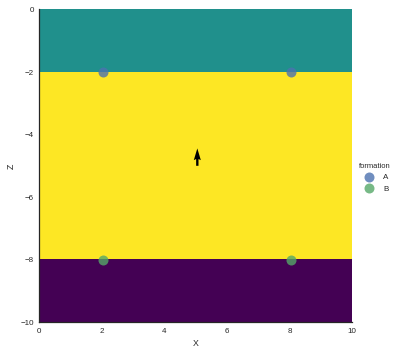

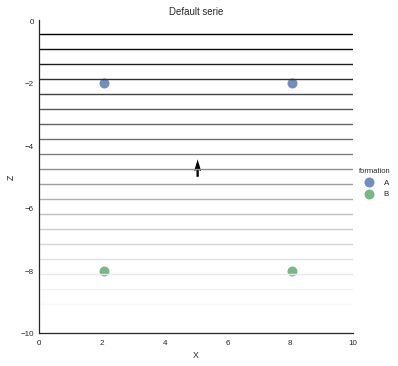

In [14]:
f = test_a()

In [48]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,10,0,10,-10, 0],[ 50, 50, 50],
                         path_f = "./GeoModeller/test_c/test_c_Foliations.csv",
                         path_i = "./GeoModeller/test_c/test_c_Points.csv")

In [49]:
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['solve_kriging'])

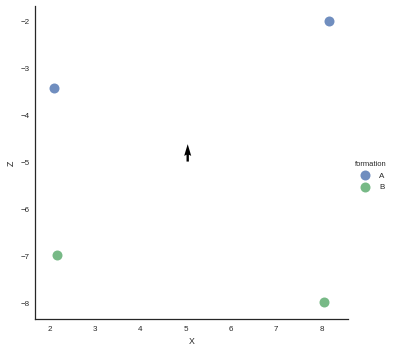

In [50]:
GeMpy.plot_data(geo_data)

In [51]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[0]) 

# Compile the theano function.
compiled_f2 = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            #on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)




In [52]:
sol2 = compiled_f2(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Dual Kriging parameters __str__ = [ 0.226956  0.        3.12595   1.393168 -1.040949]


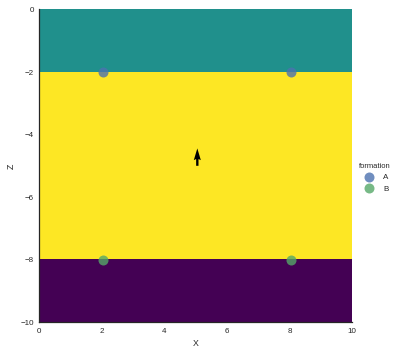

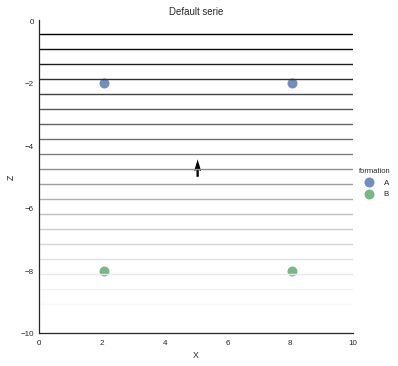

In [6]:
GeMpy.plot_section(geo_data, 25,  block = sol[0,0,:], direction='y', plot_data = True)
GeMpy.plot_potential_field(geo_data, sol[0,1,:], 25)

In [60]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,10,0,10,-10, 0],[ 50, 50, 50],
                         path_f = "./GeoModeller/test_b/test_b_Foliations.csv",
                        path_i = "./GeoModeller/test_b/test_b_Points.csv")

data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['solve_kriging'])

In [61]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3]) 

# Compile the theano function.
compiled_f3 = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            #on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)



In [62]:
sol3 = compiled_f3(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Dual Kriging parameters __str__ = [ 0.318122  0.        1.039766  2.666622 -2.427945 -0.043572  0.        0.793337]
